In [45]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None

In [46]:
# read the dataset into df
df = pd.read_csv('fifa.csv')

In [47]:
# clean the data by deleting the columns not required for the project
del df["player_url"]
del df["sofifa_id"]
del df["dob"]
del df["height_cm"]
del df["weight_kg"]
del df["international_reputation"]
del df["body_type"]
del df["real_face"]
del df["team_jersey_number"]
del df["loaned_from"]
del df["joined"]
del df["contract_valid_until"]
del df["nation_jersey_number"]
del df["defending_marking"]
del df["ls"]
del df["rs"]
del df["lw"]
del df["lf"]
del df["st"]
del df["cf"]
del df["rf"]
del df["rw"]
del df["lam"]
del df["cam"]
del df["ram"]
del df["lm"]
del df["lcm"]
del df["cm"]
del df["rcm"]
del df["rm"]
del df["lwb"]
del df["ldm"]
del df["cdm"]
del df["rdm"]
del df["rwb"]
del df["lb"]
del df["lcb"]
del df["cb"]
del df["rcb"]
del df["long_name"]
del df["league_rank"]
del df["preferred_foot"]
del df["weak_foot"]
del df["skill_moves"]
del df["player_tags"]
del df["player_traits"]
del df["rb"]
del df["team_position"]
del df["nation_position"]
del df["league_name"]
del df["goalkeeping_handling"]
del df["goalkeeping_reflexes"]
del df["goalkeeping_positioning"]
del df["goalkeeping_diving"]
del df["goalkeeping_kicking"]

# print first five records of the dataset
df.head()

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
1,Cristiano Ronaldo,35,Portugal,Juventus,92,92,46000000,220000,"ST, LW",High/Low,...,78,93,63,29,95,82,84,95,32,24
2,J. Oblak,27,Slovenia,Atlético Madrid,91,93,75000000,125000,GK,Medium/Medium,...,78,12,34,19,11,65,11,68,12,18
3,R. Lewandowski,31,Poland,FC Bayern München,91,91,80000000,240000,ST,High/Medium,...,86,85,81,49,94,79,88,88,42,19
4,Neymar Jr,28,Brazil,Paris Saint-Germain,91,91,90000000,270000,"LW, CAM",High/Medium,...,50,84,51,36,87,90,92,93,30,29


In [48]:
# 3.4 WINGERS/WIDE MIDFIELDERS

df_w = df.loc[df['player_positions'].str.contains("LW", case = True)]
df_w_2 = df.loc[df['player_positions'].str.contains("RW", case = True)]
df_w_3 = df.loc[df['player_positions'].str.contains("LM", case = True)]
df_w_4 = df.loc[df['player_positions'].str.contains("RM", case = True)]

df_w = pd.concat([df_w, df_w_2, df_w_3, df_w_4])
df_w.sort_values(by=['potential'], inplace=True, ascending=False)

df_w = df_w.reset_index(drop = True)

df_w

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,K. Mbappé,21,France,Paris Saint-Germain,90,95,105500000,160000,"ST, LW, RW",High/Low,...,76,79,62,38,91,80,70,84,34,32
1,K. Mbappé,21,France,Paris Saint-Germain,90,95,105500000,160000,"ST, LW, RW",High/Low,...,76,79,62,38,91,80,70,84,34,32
2,K. Havertz,21,Germany,Chelsea,85,93,57000000,105000,"CAM, RM, CF",Medium/Medium,...,69,78,42,38,84,82,73,84,46,38
3,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
4,J. Sancho,20,England,Borussia Dortmund,87,93,69500000,82000,"RM, LM, CAM",High/Medium,...,67,63,44,39,83,87,60,84,41,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7511,Jin Bo,27,China PR,Guangzhou R&F FC,53,53,60000,3000,"RW, LW, RM",Medium/Medium,...,63,43,65,22,55,45,48,47,36,37
7512,Zhang Junzhe,29,China PR,Hebei China Fortune FC,52,52,40000,2000,"RB, RWB",Medium/Medium,...,54,21,50,50,50,35,34,37,54,56
7513,Song Haiwang,25,China PR,Henan Jianye FC,48,51,35000,2000,LM,Medium/Medium,...,40,40,54,51,32,50,28,45,61,56
7514,Zang Yifeng,26,China PR,Shijiazhuang Ever Bright F.C.,49,50,35000,2000,LW,High/Low,...,33,40,38,19,57,61,53,65,26,23


In [49]:
# delete duplicates
df_w.drop_duplicates(keep = 'first', inplace = True)
df_w = df_w.reset_index(drop=True)

df_w

,short_name,age,nationality,club_name,overall,potential,value_eur,wage_eur,player_positions,work_rate,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
0,K. Mbappé,21,France,Paris Saint-Germain,90,95,105500000,160000,"ST, LW, RW",High/Low,...,76,79,62,38,91,80,70,84,34,32
1,K. Havertz,21,Germany,Chelsea,85,93,57000000,105000,"CAM, RM, CF",Medium/Medium,...,69,78,42,38,84,82,73,84,46,38
2,L. Messi,33,Argentina,FC Barcelona,93,93,67500000,560000,"RW, ST, CF",Medium/Low,...,69,94,44,40,93,95,75,96,35,24
3,J. Sancho,20,England,Borussia Dortmund,87,93,69500000,82000,"RM, LM, CAM",High/Medium,...,67,63,44,39,83,87,60,84,41,32
4,Vinícius Jr.,19,Brazil,Real Madrid,80,93,27500000,95000,LW,High/Medium,...,62,68,58,26,75,73,65,74,25,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,Yao Jiangshan,32,China PR,Qingdao Huanghai F.C.,53,53,45000,2000,LM,Medium/Low,...,69,31,52,35,51,34,43,39,52,53
5426,Zhang Junzhe,29,China PR,Hebei China Fortune FC,52,52,40000,2000,"RB, RWB",Medium/Medium,...,54,21,50,50,50,35,34,37,54,56
5427,Song Haiwang,25,China PR,Henan Jianye FC,48,51,35000,2000,LM,Medium/Medium,...,40,40,54,51,32,50,28,45,61,56
5428,Zang Yifeng,26,China PR,Shijiazhuang Ever Bright F.C.,49,50,35000,2000,LW,High/Low,...,33,40,38,19,57,61,53,65,26,23


In [50]:
for i in range(0, len(df_w['overall'])):
    if df_w['overall'][i] > 85:
        df_w = df_w.drop(i)

df_w = df_w.reset_index(drop=True)

# remove irrelevant columns
df_w = df_w.drop(['skill_fk_accuracy', 'defending_sliding_tackle', 'defending_standing_tackle', 'mentality_penalties', 'mentality_interceptions', 'mentality_aggression', 'power_strength', 'physic', 'attacking_heading_accuracy', 'defending', 'nationality', 'club_name', 'age', 'value_eur', 'wage_eur', 'player_positions', 'release_clause_eur', 'work_rate', 'gk_reflexes', 'gk_positioning', 'gk_handling', 'gk_diving', 'gk_kicking', 'gk_speed'], axis = 1)

# for safekeeping keep the values in w dataset
w = df_w

# get the top 10 rated wingers according to their potential
df_w = df_w[0:10]

df_w

,short_name,overall,potential,pace,shooting,passing,dribbling,attacking_crossing,attacking_finishing,attacking_short_passing,...,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_long_shots,mentality_positioning,mentality_vision,mentality_composure
0,K. Havertz,85,93,84.0,81.0,79.0,85.0,73,85,84,...,78,85,74,74,75,82,78,84,82,84
1,Vinícius Jr.,80,93,95.0,69.0,71.0,87.0,71,68,72,...,94,75,82,73,75,79,68,75,73,74
2,Trincão,78,91,79.0,73.0,71.0,83.0,69,73,71,...,83,79,67,74,63,77,74,74,75,84
3,M. Rashford,85,91,91.0,83.0,78.0,86.0,77,83,81,...,86,86,75,90,72,87,81,82,82,82
4,L. Sané,85,90,93.0,81.0,79.0,86.0,83,81,81,...,84,79,78,87,64,70,78,84,82,80
5,Oyarzabal,84,90,81.0,82.0,80.0,84.0,82,84,81,...,80,81,79,80,72,82,81,83,85,75
6,Ansu Fati,76,90,88.0,71.0,68.0,79.0,69,75,72,...,89,70,82,67,73,64,70,68,67,73
7,Rodrygo,79,90,87.0,75.0,70.0,83.0,72,78,73,...,87,78,85,71,73,81,71,83,71,82
8,T. Kubo,75,89,82.0,66.0,68.0,83.0,61,70,73,...,87,65,84,66,54,77,60,68,72,70
9,H. Aouar,81,89,76.0,75.0,80.0,84.0,68,76,85,...,82,80,83,73,64,76,75,78,84,82


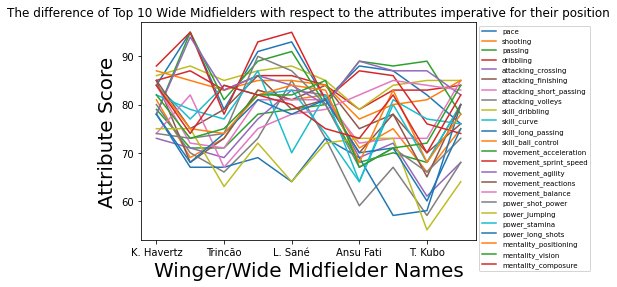

In [52]:
# plot the top 10 wingers with their most associated attributes

df_w.plot(x = 'short_name', y = ['pace', 'shooting', 'passing', 'dribbling', 'attacking_crossing', 'attacking_finishing', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_long_shots', 'mentality_positioning', 'mentality_vision', 'mentality_composure'])
plt.xlabel('Winger/Wide Midfielder Names', fontsize = 20)
plt.ylabel('Attribute Score', fontsize = 20)
plt.title("The difference of Top 10 Wide Midfielders with respect to the attributes imperative for their position")
plt.legend(bbox_to_anchor=(1, 1), fontsize = 7)
plt.show()


In [53]:
# get the winger names in names
names_w = []
names_w = pd.DataFrame(w['short_name'])
w = w.drop('short_name', axis = 1)
w = w.drop('potential', axis = 1)
names_w.append(df_w['short_name'])

w_norm = (w - w.mean())/w.std()

In [54]:
# use Linear Regression to predict the overall of wingers
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
w_x = w_norm.drop('overall', axis = 1)
w_w = w_norm['overall']

lm.fit(w_x,w_w)
yhat = lm.predict(w_x)
print(lm.intercept_)
print(lm.coef_)

1.9931604005173288e-16
[ 0.03335732  0.2242985  -0.00744717  0.01132729  0.17365673 -0.13335496
  0.16256791 -0.03777038  0.10249854 -0.01676225 -0.00063366  0.25338758
  0.03105702  0.06454423 -0.02113244  0.2421053  -0.02305378 -0.04789575
  0.03446455  0.08537529 -0.03847259  0.05849675 -0.05063161  0.08468635]


In [55]:
# get the actual and predicted table for wingers
avp = pd.DataFrame({'Actual' : w_w, 'Predicted' : yhat})
df.sort_index(inplace=True)

add_names = avp.join(names_w['short_name'])

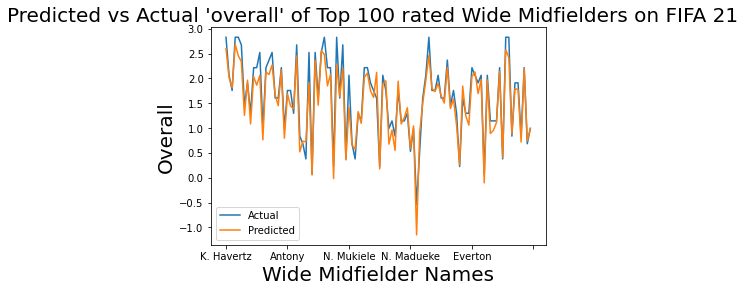

In [56]:
# plot the actual vs predicted of top 100 rated wingers according
# to their potential

add_names[0:100].plot(x = 'short_name', y = ['Actual','Predicted'])
plt.figtext(.5, .9, "Predicted vs Actual 'overall' of Top 100 rated Wide Midfielders on FIFA 21", fontsize = 20, ha = 'center')
plt.xlabel('Wide Midfielder Names', fontsize = 20)
plt.ylabel('Overall', fontsize = 20)
plt.show()


In [57]:
# get the error rate for linear regression
from sklearn import metrics
from math import sqrt
print('Mean Squared Error:', sqrt(metrics.mean_squared_error(w_w, yhat)))
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(w_w, yhat)))

Mean Squared Error: 0.2387560171740906
Accuracy: 0.7612439828259094


In [58]:
# accuracy for the top 1,000 wingers
print('Accuracy:', 1 - sqrt(metrics.mean_squared_error(w_w[:1000], yhat[:1000])))

Accuracy: 0.7926757731959568
